In [2]:
# 파이썬 ≥3.5
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import os
import numpy as np

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER = "DTFS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

그림 저장: x_data


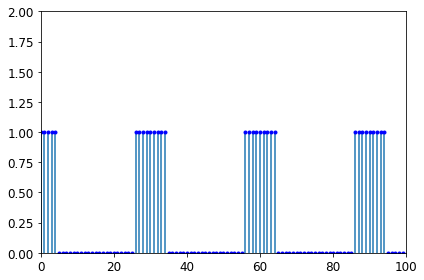

In [2]:
L = (4,2)
N = (10,20,30,100)
f = [1/data for data in N]
sequence = 2

n_min, n_max = (0, 100)


x = [1 if (abs(i)%N[sequence] <= L[0] or abs(i)%N[sequence] >= N[sequence]-L[0]) else 0 for i in range(n_min, n_max)]




plt.ylim(0,2)
plt.xlim(0, n_max)
plt.plot(x, 'b.')
for i, x_data in zip(range(0, n_max+1), x):
    plt.vlines(i, 0,x_data)
save_fig("x_data")

그림 저장: cn1


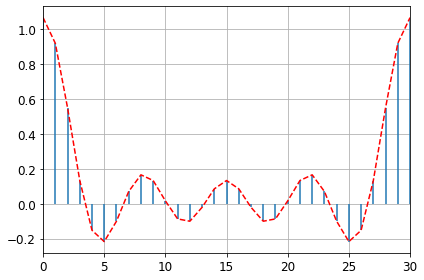

In [4]:
def cn(k):
    c = [x_data*np.exp(-1j * index * f[sequence] *k * np.pi * 2) for index, x_data in enumerate(x)]
    return sum(c)/N[sequence]

y2 = [cn(k) for k in range(N[sequence]+1)]
plt.xlim(0,N[sequence])
for i, y_data in zip(range(0, N[sequence]+1), y2):
    plt.vlines(i, 0, y_data)
plt.grid(True)
plt.plot(y2, 'r--')
save_fig("cn1")

그림 저장: x_impulse


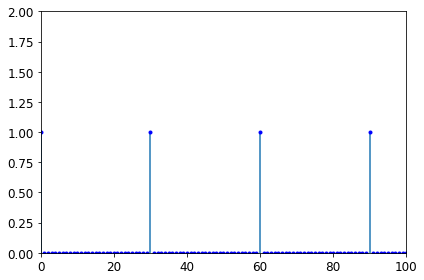

In [5]:
x_impulse = [1 if (abs(i)%N[sequence] == 0) else 0 for i in range(n_min, n_max+1)]

plt.ylim(0,2)
plt.xlim(0, n_max)
plt.plot(x_impulse, 'b.')
for i, x_data in zip(range(0, n_max+1), x_impulse):
    plt.vlines(i, 0,x_data)
save_fig("x_impulse")

그림 저장: y_impulse


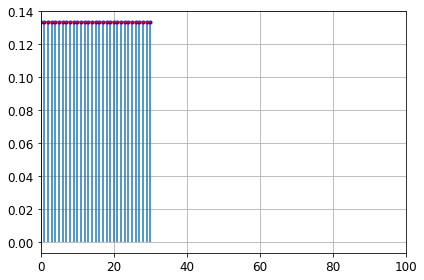

In [6]:
def cn2(k):
    c = [x_data*np.exp(-1j * index * f[sequence] *k * np.pi * 2) for index, x_data in enumerate(x_impulse)]
    return sum(c)/N[sequence]

y_impulse = [cn2(k) for k in range(N[sequence]+1)]
plt.xlim(0,100)
plt.plot(y_impulse, 'b.')
for i, y_data in zip(range(0, N[sequence]+1), y_impulse):
    plt.vlines(i, 0, y_data)
plt.grid(True)
plt.plot(y_impulse, 'r-')
save_fig("y_impulse")

Enter upto how much term you want the infinite series to be approximated: 10


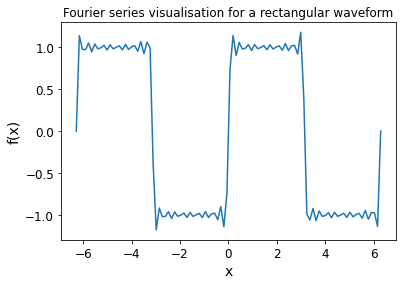

In [7]:
n = int(input("Enter upto how much term you want the infinite series to be approximated:"))
def function(x):
    sum = 0
    for i in range(0,n):
        sum = sum + (4/np.pi)*np.sin((2*i + 1)*x)/(2*i + 1)
    return sum
y = []
x = list(np.linspace(-2*np.pi,2*np.pi,100))
for i in range(0,len(x)):
    y.append(function(x[i]))
plt.plot(x,y)
plt.title("Fourier series visualisation for a rectangular waveform")    
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

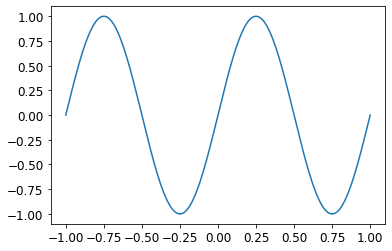

In [5]:
X = []
N=50
x = np.linspace(-1, 1, 201)
plt.plot(x, np.sin(x*2*np.pi))
for i in range(1, N): # i : 0 ~ N-1
    X.append(0)       # X[i] 번째 생성
    for n in range(0, N): # n : 0 ~ N-1
        X[i-1] = X[i-1] + x[n] * np.exp(-1j * 2 * np.pi * (n) * (i-1) / N)